In [1]:
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

from mtist import infer_mtist as im
from mtist import graphing_utils as gu

%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams.update({'font.family':'Helvetica'}) 




In [2]:
meta = pd.read_csv('mtist_datasets/mtist_metadata.csv').drop(columns='Unnamed: 0').set_index('did')
meta

,n_species,ground_truth,noise,n_timeseries,n_timepoints,sampling_scheme
did,,,,,,
0,100,100_sp_gt,0.01,10,5,even
1,100,100_sp_gt,0.01,10,15,even
2,100,100_sp_gt,0.01,10,5,random
3,100,100_sp_gt,0.01,10,15,random
4,100,100_sp_gt,0.01,10,5,seq
...,...,...,...,...,...,...
643,3,3_sp_gt_8,0.10,50,15,even
644,3,3_sp_gt_8,0.10,50,5,random
645,3,3_sp_gt_8,0.10,50,15,random


In [5]:
meta.loc[did]

n_species                  10
ground_truth       10_sp_gt_3
noise                    0.01
n_timeseries               50
n_timepoints               15
sampling_scheme           seq
Name: 125, dtype: object

In [3]:
random.seed(11206)
did = random.choice(meta.query('sampling_scheme == "seq" and n_timepoints > 10').index)

path_en = f"mtist_datasets/elasticnet_CV_inference_result/elasticnet_CV_inferred_aij_{did}.csv"
path_mkseqspike = f"other_inference_results/10species/mkseqspike_inferred_aij_{did}.csv"

#########################################################################################################

truth = np.loadtxt(
    f"ground_truths/interaction_coefficients/{meta.loc[did, 'ground_truth'].replace('gt', 'aij')}.csv",
    delimiter=",",
)

result_en = np.loadtxt(path_en, delimiter=',')
result_mkseqspike = np.loadtxt(path_mkseqspike, delimiter=',')

In [4]:
print(im.calculate_es_score(truth, result_mkseqspike))
print(im.calculate_es_score(truth, result_en))
print()
meta.loc[did]

0.8829787234042553
0.9361702127659575



n_species                  10
ground_truth       10_sp_gt_3
noise                    0.01
n_timeseries               50
n_timepoints               15
sampling_scheme           seq
Name: 125, dtype: object

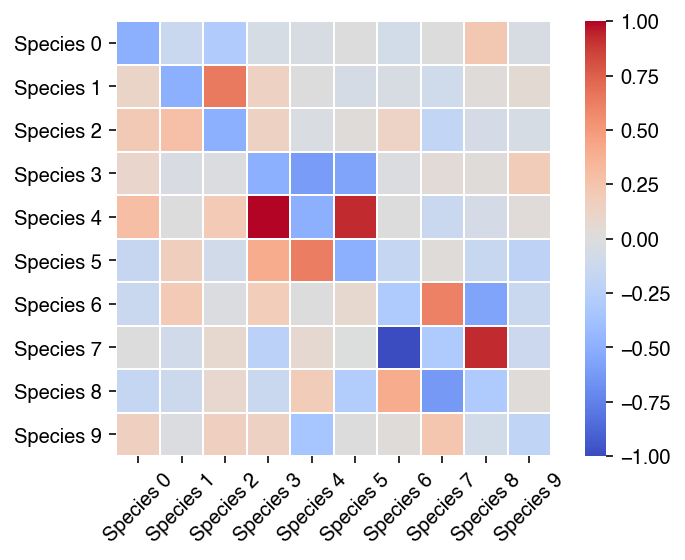

In [5]:
tmp = truth
sns.heatmap(tmp, center=0, cmap="coolwarm", square=True, linewidths=1, vmax=1, vmin=-1)

ax = plt.gca()
ax.set_xticklabels([f'Species {i}' for i in range(10)], rotation=45)
ax.set_yticklabels([f'Species {i}' for i in range(10)], rotation='horizontal');

fig = plt.gcf()
gu.savefig(fig, os.path.join("exported_figures", "truth_heatmap"), ft="svg")


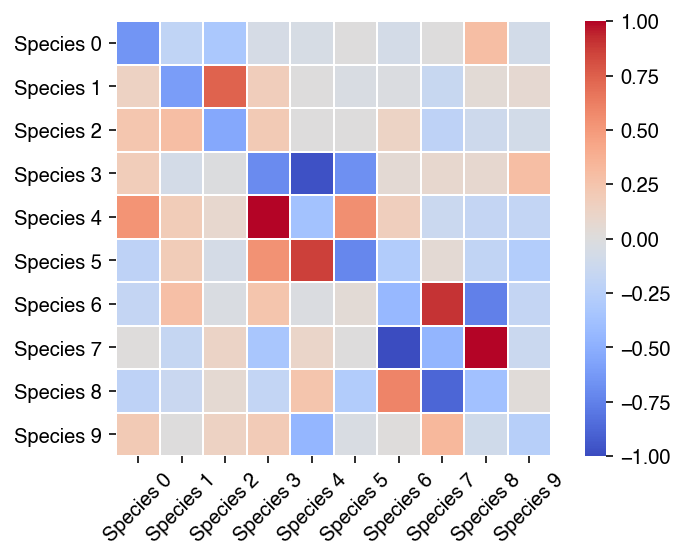

In [6]:
tmp = result_en
sns.heatmap(tmp, center=0, cmap="coolwarm", square=True, linewidths=1, vmax=1, vmin=-1)

ax = plt.gca()
ax.set_xticklabels([f'Species {i}' for i in range(10)], rotation=45)
ax.set_yticklabels([f'Species {i}' for i in range(10)], rotation='horizontal');

fig = plt.gcf()
gu.savefig(fig, os.path.join("exported_figures", "en_result_heatmap"), ft="svg")


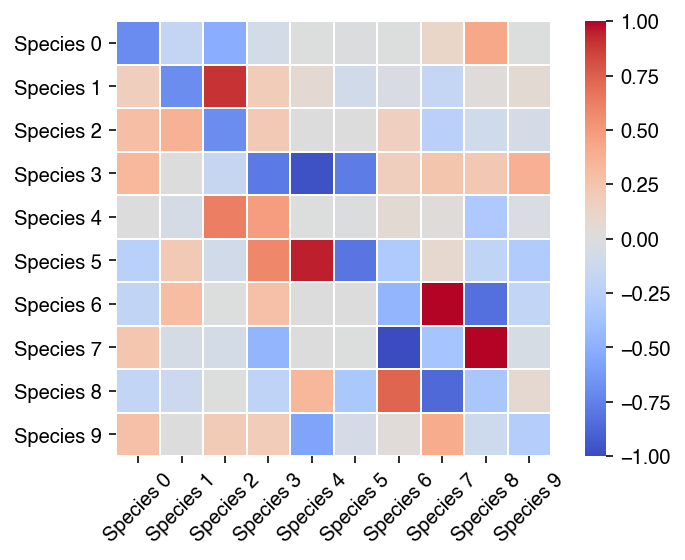

In [7]:
tmp = result_mkseqspike
sns.heatmap(tmp, center=0, cmap='coolwarm', square=True, linewidths=1, vmax=1, vmin=-1)

ax = plt.gca()
ax.set_xticklabels([f'Species {i}' for i in range(10)], rotation=45)
ax.set_yticklabels([f'Species {i}' for i in range(10)], rotation='horizontal');

fig = plt.gcf()
gu.savefig(fig, os.path.join('exported_figures', 'mkseqspike_result_heatmap') , ft='svg')

In [8]:
# truth[truth == 0] = np.nan
result_en[result_en == 0] = np.nan
result_mkseqspike[result_mkseqspike == 0] = np.nan

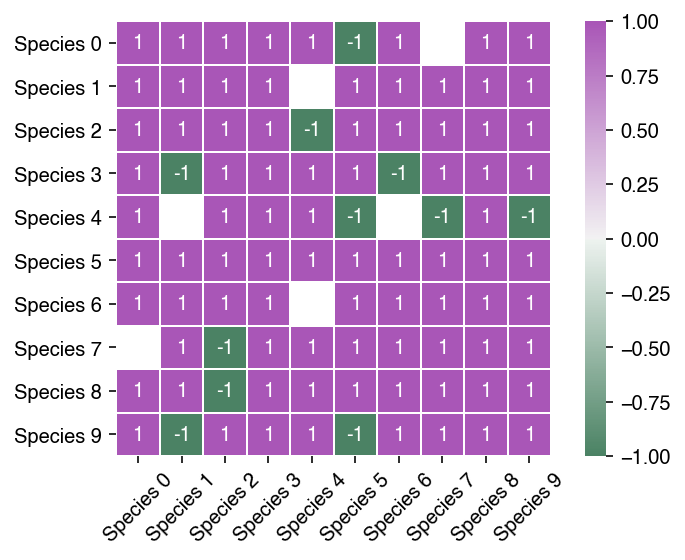

In [9]:
tmp = np.array(np.sign(result_mkseqspike) == np.sign(truth), dtype="float64")
tmp[truth == 0] = np.nan
tmp[result_mkseqspike == 0] = np.nan
tmp[tmp == 0] = -1

####################################################################################

sns.heatmap(
    tmp,
    center=0,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    square=True,
    linewidths=1,
    vmax=1,
    vmin=-1,
    annot=True,
)

ax = plt.gca()
ax.set_xticklabels([f'Species {i}' for i in range(10)], rotation=45)
ax.set_yticklabels([f'Species {i}' for i in range(10)], rotation='horizontal');

fig = plt.gcf()
gu.savefig(fig, os.path.join('exported_figures','mkseqspike_result_counts_heatmap'), ft='svg')

In [10]:
print('Correct', np.sum(tmp == 1))
print('Incorrect', np.sum(tmp == -1))
print('ES Score', im.calculate_es_score(truth, result_mkseqspike))

Correct 83
Incorrect 11
ES Score 0.8829787234042553


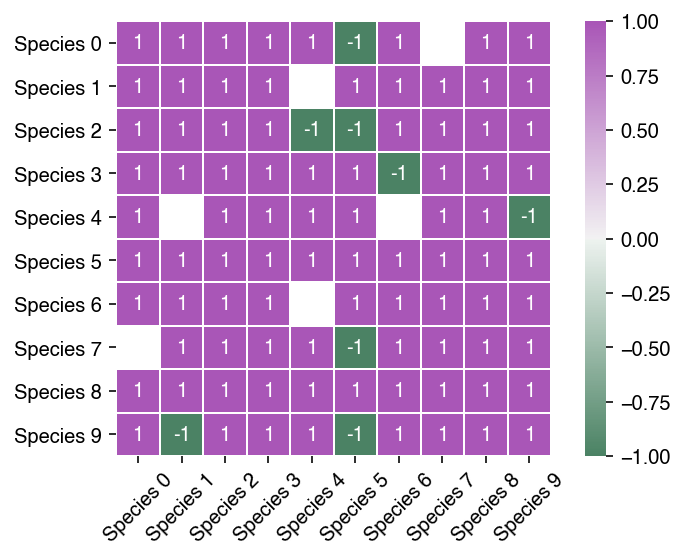

In [11]:
tmp = np.array(np.sign(result_en) == np.sign(truth), dtype="float64")
tmp[truth == 0] = np.nan
tmp[result_en == 0] = np.nan
tmp[tmp == 0] = -1

####################################################################################

sns.heatmap(
    tmp,
    center=0,
    cmap=sns.diverging_palette(145, 300, s=60, as_cmap=True),
    square=True,
    linewidths=1,
    vmax=1,
    vmin=-1,
    annot=True,
)

ax = plt.gca()
ax.set_xticklabels([f"Species {i}" for i in range(10)], rotation=45)
ax.set_yticklabels([f"Species {i}" for i in range(10)], rotation="horizontal")


fig = plt.gcf()
gu.savefig(fig, os.path.join("exported_figures", "en_result_counts_heatmap"), ft="svg")


In [12]:
print("Correct", np.sum(tmp == 1))
print("Incorrect", np.sum(tmp == -1))
print("ES Score", im.calculate_es_score(truth, result_en))


Correct 86
Incorrect 8
ES Score 0.9361702127659575
